<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.551428,-0.004337,30.547090,30.551073,-0.003983
1,0.0,1.0,22.929615,0.004332,32.933947,32.929274,0.004672
2,0.0,2.0,32.027622,0.001520,42.029143,42.027335,0.001808
3,0.0,3.0,27.745393,0.003634,37.749027,37.745081,0.003946
4,0.0,4.0,46.955435,-0.000217,56.955218,56.955234,-0.000016
...,...,...,...,...,...,...,...
119995,999.0,115.0,85.095787,0.000142,95.095929,95.095895,0.000033
119996,999.0,116.0,77.783838,-0.000279,87.783559,87.783855,-0.000296
119997,999.0,117.0,72.853073,-0.000177,82.852896,82.853028,-0.000132
119998,999.0,118.0,41.064052,-0.001341,51.062711,51.063608,-0.000896


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.551428,-0.004337,30.547090,30.551073,-0.003983
1,0.0,1.0,22.929615,0.004332,32.933947,32.929274,0.004672
2,0.0,2.0,32.027622,0.001520,42.029143,42.027335,0.001808
3,0.0,3.0,27.745393,0.003634,37.749027,37.745081,0.003946
4,0.0,4.0,46.955435,-0.000217,56.955218,56.955234,-0.000016
...,...,...,...,...,...,...,...
119995,999.0,115.0,85.095787,0.000142,95.095929,95.095895,0.000033
119996,999.0,116.0,77.783838,-0.000279,87.783559,87.783855,-0.000296
119997,999.0,117.0,72.853073,-0.000177,82.852896,82.853028,-0.000132
119998,999.0,118.0,41.064052,-0.001341,51.062711,51.063608,-0.000896


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    20.551428 -0.004337  30.547090  30.551073 -0.003983
      1.0    22.929615  0.004332  32.933947  32.929274  0.004672
      2.0    32.027622  0.001520  42.029143  42.027335  0.001808
      3.0    27.745393  0.003634  37.749027  37.745081  0.003946
      4.0    46.955435 -0.000217  56.955218  56.955234 -0.000016
...                ...       ...        ...        ...       ...
999.0 115.0  85.095787  0.000142  95.095929  95.095895  0.000033
      116.0  77.783838 -0.000279  87.783559  87.783855 -0.000296
      117.0  72.853073 -0.000177  82.852896  82.853028 -0.000132
      118.0  41.064052 -0.001341  51.062711  51.063608 -0.000896
      119.0  40.900081  0.001795  50.901876  50.899635  0.002242

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    20.551428 -0.004337  30.547090  30.551073 -0.003983
      1.0    22.929615  0.004332  32.933947  32.929274  0.004672
      2.0    32.027622  0.001520  42.029143  42.027335  0.001808
      3.0    27.745393  0.003634  37.749027  37.745081  0.003946
      4.0    46.955435 -0.000217  56.955218  56.955234 -0.000016
...                ...       ...        ...        ...       ...
999.0 115.0  85.095787  0.000142  95.095929  95.095895  0.000033
      116.0  77.783838 -0.000279  87.783559  87.783855 -0.000296
      117.0  72.853073 -0.000177  82.852896  82.853028 -0.000132
      118.0  41.064052 -0.001341  51.062711  51.063608 -0.000896
      119.0  40.900081  0.001795  50.901876  50.899635  0.002242

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.551428,-0.004337,30.547090,30.551073,-0.003983
1,0.0,1.0,22.929615,0.004332,32.933947,32.929274,0.004672
2,0.0,2.0,32.027622,0.001520,42.029143,42.027335,0.001808
3,0.0,3.0,27.745393,0.003634,37.749027,37.745081,0.003946
4,0.0,4.0,46.955435,-0.000217,56.955218,56.955234,-0.000016
...,...,...,...,...,...,...,...
119995,999.0,115.0,85.095787,0.000142,95.095929,95.095895,0.000033
119996,999.0,116.0,77.783838,-0.000279,87.783559,87.783855,-0.000296
119997,999.0,117.0,72.853073,-0.000177,82.852896,82.853028,-0.000132
119998,999.0,118.0,41.064052,-0.001341,51.062711,51.063608,-0.000896


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    20.551428 -0.004337  30.547090  30.551073 -0.003983
      1.0    22.929615  0.004332  32.933947  32.929274  0.004672
      2.0    32.027622  0.001520  42.029143  42.027335  0.001808
      3.0    27.745393  0.003634  37.749027  37.745081  0.003946
      4.0    46.955435 -0.000217  56.955218  56.955234 -0.000016
...                ...       ...        ...        ...       ...
999.0 115.0  85.095787  0.000142  95.095929  95.095895  0.000033
      116.0  77.783838 -0.000279  87.783559  87.783855 -0.000296
      117.0  72.853073 -0.000177  82.852896  82.853028 -0.000132
      118.0  41.064052 -0.001341  51.062711  51.063608 -0.000896
      119.0  40.900081  0.001795  50.901876  50.899635  0.002242

[120000 rows x 5 columns]

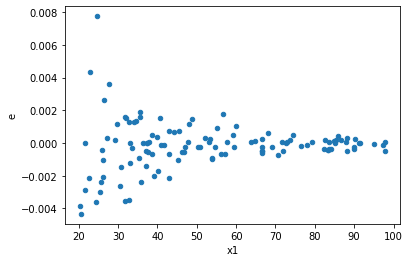

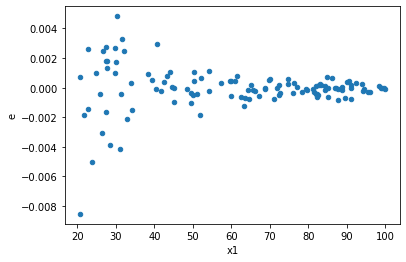

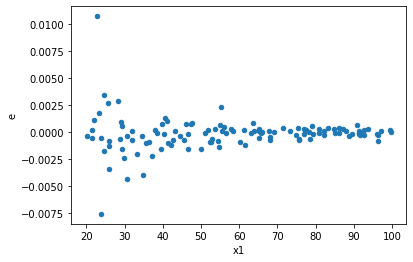

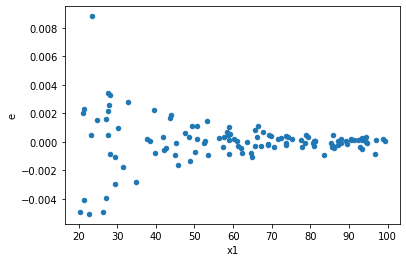

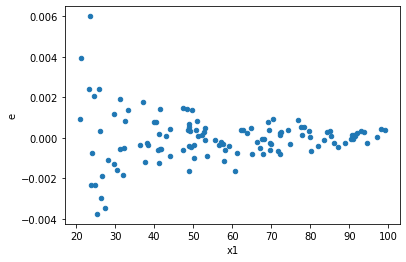

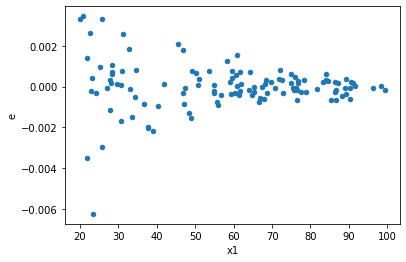

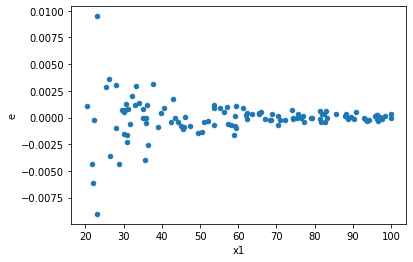

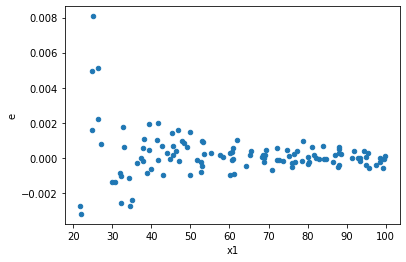

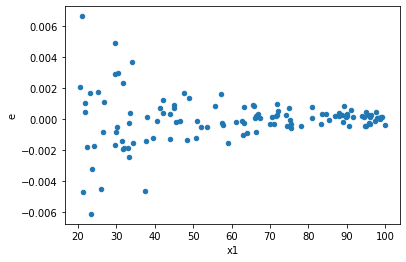

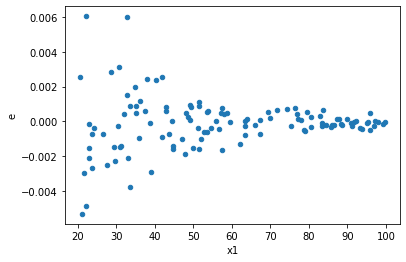

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.0002426680370850692,6.049926950065143e-06,5.163149725214238e-06,1.2872185000138603e-07,0.024930876858513897,1.130869923791267e-25,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,0.0002541392631512155,5.736635442078394e-06,5.407218364919479e-06,1.220560732357105e-07,0.022572802686789233,1.2144978277140561e-26,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,0.0002857003623855366,5.33995187290486e-06,6.078731114585886e-06,1.1361599729584809e-07,0.018690742385894823,1.70912970260497e-28,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,0.00028753239866501204,4.490339603342011e-06,6.117710609893873e-06,9.553914049663854e-08,0.015616812658991711,2.8714688653387135e-30,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,0.00015487967357787852,8.50813506594697e-06,3.2953122037846493e-06,1.8102415033929721e-07,0.05493383908553244,3.5665831633254095e-18,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,0.0001523854961188504,5.989172159692043e-06,3.2422445982734128e-06,1.2742919488706474e-07,0.03930277035696949,2.6712560219711155e-21,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,0.00036608473395945227,4.032758927408844e-06,7.789036892754303e-06,8.580338143423072e-08,0.011015916680796404,9.660969914523272e-34,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,0.00018964768282547567,6.193887896008216e-06,4.0350570813931e-06,1.3178484885123864e-07,0.03265997139394619,4.5974423949197405e-23,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,0.00027580655265935645,6.162731724208472e-06,5.868224524667158e-06,1.3112195157890367e-07,0.02234439923485048,9.659883713795406e-27,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64